

<font size = "5"> **Chapter 4: [Spectroscopy](CH4-Spectroscopy.ipynb)** </font>

<hr style="height:1px;border-top:4px solid #FF8200" />



# Working with X-Sections

[Download](https://raw.githubusercontent.com/gduscher/MSE672-Introduction-to-TEM/main/Spectroscopy/CH4_07-Working_with_X-Sections.ipynb)
 
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/gduscher/MSE672-Introduction-to-TEM/blob/main/Spectroscopy/CH4_07-Working_with_X-Sections.ipynb)


part of 

<font size = "5"> **[MSE672:  Introduction to Transmission Electron Microscopy](../_MSE672_Intro_TEM.ipynb)**</font>

by Gerd Duscher, Spring 2021

Microscopy Facilities<br>
Joint Institute of Advanced Materials<br>
Materials Science & Engineering<br>
The University of Tennessee, Knoxville

Background and methods to analysis and quantification of data acquired with transmission electron microscopes.

## Core --Loss Spectroscopy

As we can see in figure below the energies of the core shells are well defined and can be viewed as delta functions, unlike in the low loss region where the broad valence bands are the initial state. In both cases, however, we excite electrons into the conduction band.

<img title="core-loss" width="50%" alt="core-loss" src="images/core-loss.jpg">
*Excitation from a core-shell state ]{\label{fig:coreloss} Excitation from a core-shell state up into the conduction band above the Fermi level.*

If we look at the transition between two states $< \Phi_f | H | \Phi_i >$ the transition should be quite sharp. In the case of the low-loss spectrum, we have many initial (the valence) states and many final (the conduction) states. The spectrum will be a convolution of these states. 

The features of the core--loss edges are, therefore, much sharper than any details in the low--loss region. Because only the final states contribute to the features. These sharp features enable a wide variety of analysis to determine the chemical compositions and chemical bonding, probing the local conduction band of the sample.



### Chemical Composition

In this chapter we use the area under the ionization edge to determine the chemical composition of a (small) sample volume. 
The equation used to determine the number of atoms per unit volume $N$ (also called areal density) is:
\begin{equation}
I_{edge}(\beta, \Delta E) = N I_{0}(\beta) \sigma_{edge}(\beta, \Delta E)
\end{equation}

$I_0$ is the number of electrons hitting the sample, and so directly comparable to the beam current.

The equation can be approximated assuming that the spectrum has not been corrected for single scattering:
\begin{equation} 
I_{edge}(\beta, \Delta E) = N I_{low-loss}(\beta,\Delta E) \sigma_{edge}(\beta, \Delta E)
\end{equation}
where $\beta$ is the collection angle and $\sigma_{edge}$ is the **partial** cross--section (for energy window $\Delta E$) for the core--loss excitation.


> 
> It is this cross-section $ \sigma_{edge}$ that we want to explorein this notebook.
>
We will do the chemical composition in the [next notebook](CH4_08-Chemical_Composition.ipynb)



## Load important packages

### Check Installed Packages


In [ ]:
import sys
from pkg_resources import get_distribution, DistributionNotFound

def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = get_distribution(package_name).version
    except (DistributionNotFound, ImportError) as err:
        version = '-1'
    return version

# Colab setup ------------------
if 'google.colab' in sys.modules:
    !pip install pyTEMlib -q
# pyTEMlib setup ------------------
else:
    if test_package('pyTEMlib') < '0.2021.3.22':
        print('installing pyTEMlib')
        !{sys.executable} -m pip install  --upgrade pyTEMlib -q
# ------------------------------
print('done')

### Import all relevant libraries

Please note that the EELS_tools package from pyTEMlib is essential.

In [3]:
import sys
if 'google.colab' in sys.modules:
    %pylab --no-import-all inline
else:    
    %pylab --no-import-all notebook
    %gui qt
    
import warnings
warnings.filterwarnings('ignore')

## We need to import a few important additional function from matplotlib, 
## because we want to demonstrate a few more hidden functionalities of the EELS_tools of pytTEMlib.
from matplotlib.widgets import Cursor
from matplotlib.patches import Rectangle
from matplotlib.widgets import SpanSelector

## import the configuration files of pyTEMlib (we need access to the data folder)
import pyTEMlib
import pyTEMlib.eels_tools as eels

# For archiving reasons it is a good idea to print the version numbers out at this point
print('pyTEM version: ',pyTEMlib.__version__)

Populating the interactive namespace from numpy and matplotlib
pyTEM version:  0.2021.04.02


## Load Cross-Sections


The form factors are from:
X-Ray Form Factor, Attenuation, and Scattering Tables
NIST Standard Reference Database 66

 DOI: https://dx.doi.org/10.18434/T4HS32

Detailed Tabulation of Atomic Form Factors, Photoelectric Absorption and Scattering Cross Section, and Mass Attenuation Coefficients for Z = 1-92 from E = 1-10 eV to E = 0.4-1.0 MeV
C.T. Chantler,1 K. Olsen, R.A. Dragoset, J. Chang, A.R. Kishore, S.A. Kotochigova, and D.S. Zucker
NIST, Physical Measurement Laboratory

The cross sections are part of the pyTEMlib package and are stored as a pickled dictionary in the package data directory.

Below are the lines for accessing the cross sections with eels_tools of pyTEMlib.

In [4]:
Xsections = eels.get_x_sections()

## Plot Cross Sections

Please add your favourite element ot the list of atomic numbers.

With the code cell above we made the whole database of cross secitons available for this notebook.

<IPython.core.display.Javascript object>


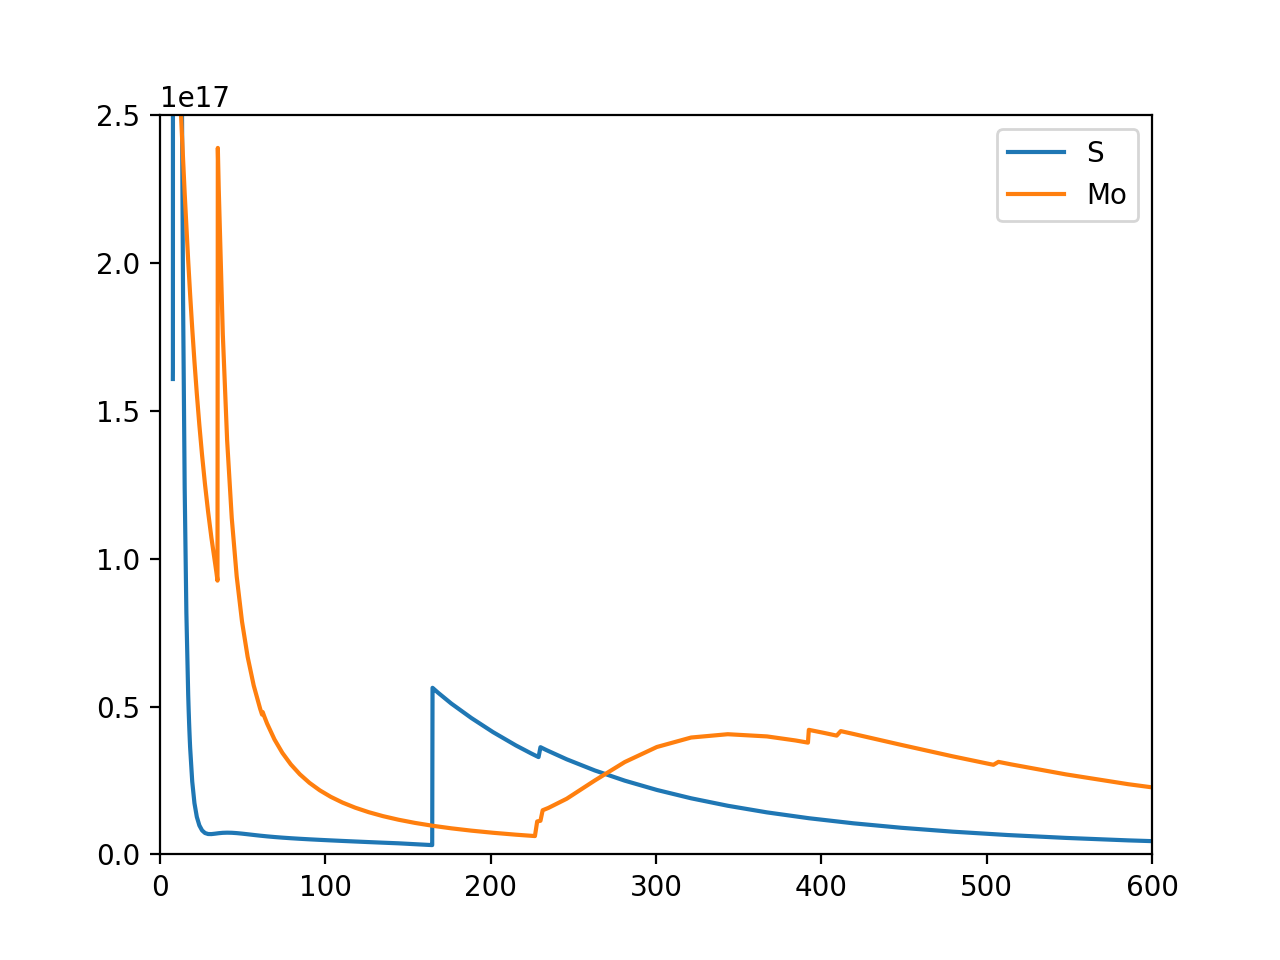

In [5]:
# -----Input ------------ #
atomic_numbers = [16, 42]
# ----------------------- #
fig, ax = plt.subplots()
for Z in atomic_numbers:
    ax.plot(Xsections[str(Z)]['ene'], Xsections[str(Z)]['dat'], label = Xsections[str(Z)]['name'])

ax.set_xlim(0,600)
ax.set_ylim(0,2.5e17)
plt.legend();

# List All Edges of an Element 

In [6]:
element = str(42)
for key in Xsections[element]:
    if isinstance(Xsections[element][key], dict):
        if 'onset' in Xsections[element][key]:
            print(f"{Xsections[element]['name']}-{key}: {Xsections[element][key]['onset']:8.1f} eV ")
            


Mo-N3:     34.8 eV 
Mo-M5:    227.0 eV 
Mo-N5:      1.8 eV 
Mo-M4:    230.3 eV 
Mo-N2:     34.8 eV 
Mo-N1:     61.8 eV 
Mo-L3:   2520.2 eV 
Mo-M1:    504.6 eV 
Mo-L2:   2625.1 eV 
Mo-L1:   2865.5 eV 
Mo-K1:  19999.5 eV 
Mo-N4:      1.8 eV 
Mo-M3:    392.3 eV 
Mo-M2:    409.7 eV 


Or ordered

In [7]:
major_edges = ['K1', 'L3', 'M5', 'N5']
all_edges = ['K1','L1','L2','L3','M1','M2','M3','M4','M5','N1', 'N2','N3','N4','N5','N6','N7','O1','O2','O3','O4','O5','O6','O7', 'P1', 'P2', 'P3']
first_close_edges = ['K1', 'L3', 'M5', 'M3', 'N5', 'N3']

element = str(42)

def list_all_edges(Z):
    element = str(Z)
    print('All edges')
    for key in all_edges:
        if key in Xsections[element]:
            if 'onset' in Xsections[element][key]:
                print(f" {Xsections[element]['name']}-{key}: {Xsections[element][key]['onset']:8.1f} eV ")

def list_major_edges(Z):
    element = str(Z)
    print('Major edges')
    for key in major_edges:
        if key in Xsections[element]:
            if 'onset' in Xsections[element][key]:
                print(f" {Xsections[element]['name']}-{key}: {Xsections[element][key]['onset']:8.1f} eV ")                      
## Here with the function of the EELS_tools package                      
list_all_edges(element)
list_major_edges(element)

All edges
 Mo-K1:  19999.5 eV 
 Mo-L1:   2865.5 eV 
 Mo-L2:   2625.1 eV 
 Mo-L3:   2520.2 eV 
 Mo-M1:    504.6 eV 
 Mo-M2:    409.7 eV 
 Mo-M3:    392.3 eV 
 Mo-M4:    230.3 eV 
 Mo-M5:    227.0 eV 
 Mo-N1:     61.8 eV 
 Mo-N2:     34.8 eV 
 Mo-N3:     34.8 eV 
 Mo-N4:      1.8 eV 
 Mo-N5:      1.8 eV 
Major edges
 Mo-K1:  19999.5 eV 
 Mo-L3:   2520.2 eV 
 Mo-M5:    227.0 eV 
 Mo-N5:      1.8 eV 


## Plotting all edges of an element in view

Now, let's do it graphically

<IPython.core.display.Javascript object>


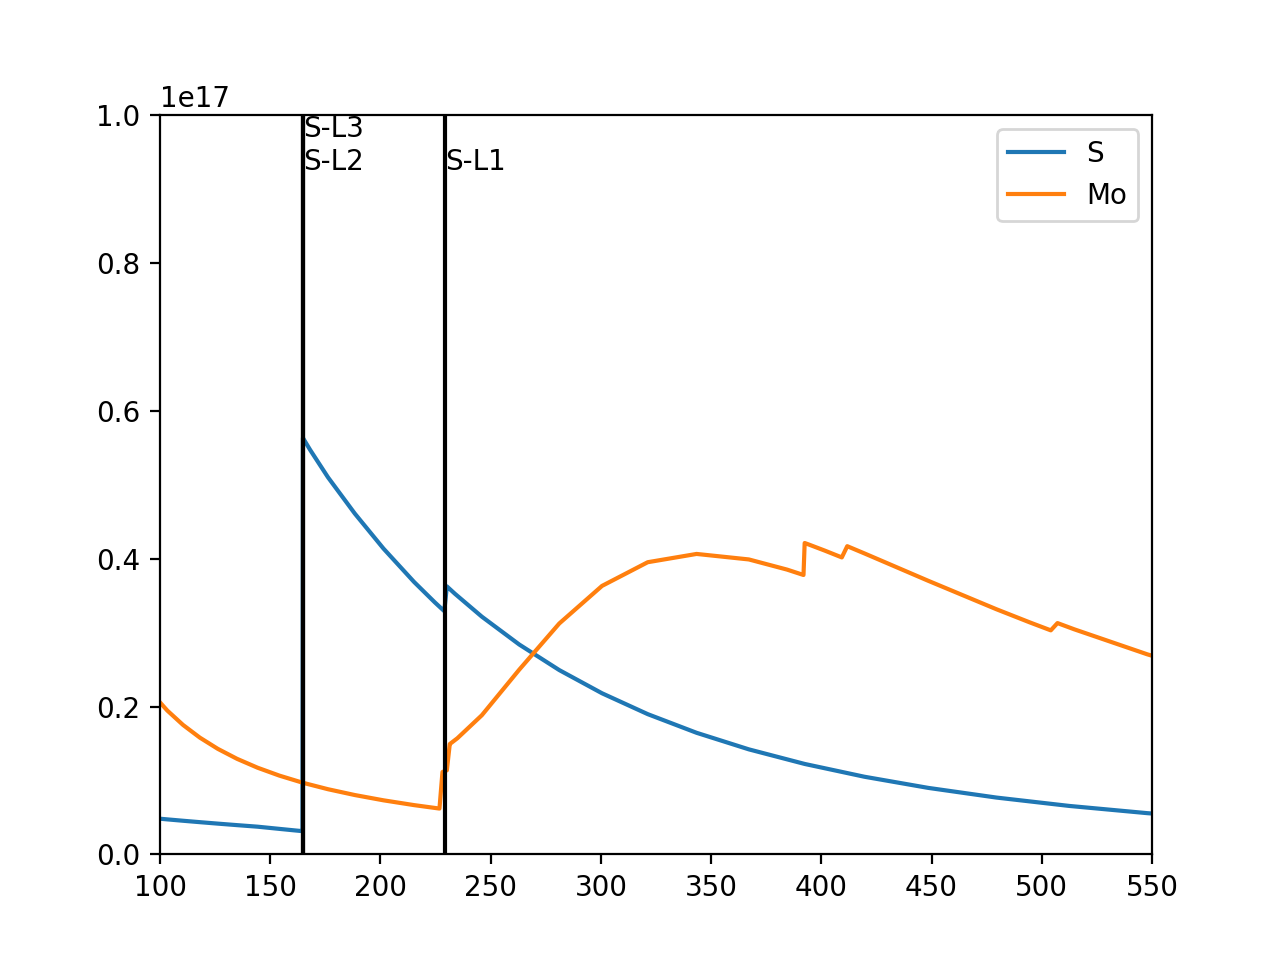

In [18]:
major_edges = ['K1', 'L3', 'M5', 'N5']
all_edges = ['K1','L1','L2','L3','M1','M2','M3','M4','M5','N1', 'N2','N3','N4','N5','N6','N7','O1','O2','O3','O4','O5','O6','O7', 'P1', 'P2', 'P3']
first_close_edges = ['K1', 'L3', 'M5', 'M3', 'N5', 'N3']

def get_Z(Z):
    """
    returns the atomic number independent of input as a string or number
    
    input:
    Z: atomic number of chemical symbol (0 if not valid)
    """
    Xsections = eels.get_x_sections()
    
    Z_out = 0
    if str(Z).isdigit(): 
        Z_out = Z
    elif isinstance(Z, str):
        for key in Xsections:
            if Xsections[key]['name'].lower() == Z.lower(): ## Well one really should know how to write elemental 
                Z_out = int(key)
    return Z_out


class elemental_edges(object):
    def __init__(self, ax, Z):
        self.ax = ax
        self.labels = None
        self.lines = None
        
        self.Z = get_Z(Z)
        self.color = 'black'
        self.Xsections = eels.get_x_sections()
        self.cid = ax.figure.canvas.mpl_connect('draw_event', self.onresize)
        
        #self.update()
    def set_edge(self,Z):
        self.Z = get_Z(Z)
        
            
        self.update()
    def onresize(self, event):
        self.update()
        
    def update(self):
        
        if self.labels != None:
            for label in self.labels:
                label.remove()
        if self.lines != None:
            for line in self.lines:
                line.remove()
        if self.Z>0:
            self.labels = [] ; self.lines =[] 
            x_min, x_max = self.ax.get_xlim()
            y_min, y_max = self.ax.get_ylim()
            x_bounds = ax.get_xlim()
            element = str(self.Z)
            Xsections = self.Xsections
            for key in all_edges:
                if key in Xsections[element]:
                    if 'onset' in Xsections[element][key]:
                        x = Xsections[element][key]['onset']
                        if x > x_min and x < x_max:
                            if key in first_close_edges:
                                label2 = self.ax.text(x, y_max,f"{Xsections[element]['name']}-{key}",
                                                      verticalalignment='top', rotation = 0, color = self.color)
                            else:
                                label2 = self.ax.text(x, y_max,f"\n{Xsections[element]['name']}-{key}",
                                                      verticalalignment='top', color = self.color)
                            line2 = self.ax.axvline(x,ymin = 0,ymax = 1,color=self.color)

                            self.labels.append(label2)

                            self.lines.append(line2)
                    
        
    def disconnect(self):
        if self.labels != None:
            for label in self.labels:
                label.remove()
        if self.lines != None:
            for line in self.lines:
                line.remove()
        self.labels = None
        self.lines = None
        self.ax.figure.canvas.mpl_disconnect(self.cid)
    def reconnect(self):    
        self.cid = ax.figure.canvas.mpl_connect('draw_event', self.onresize)
        ax.figure.canvas.draw_idle()
        
fig, ax_Xsec = plt.subplots()                
for Z in atomic_numbers:
    ax_Xsec.plot(Xsections[str(Z)]['ene'], Xsections[str(Z)]['dat'], label = Xsections[str(Z)]['name'])
ax_Xsec.set_xlim(100,550)
ax_Xsec.set_ylim(0,1e17)
plt.legend();   
Z = 42
edges = elemental_edges(ax_Xsec, 'mO')


Let's make the lines disappear

In [20]:
edges.disconnect()

and reappear in the plot above

In [21]:
edges.set_edge(Z)

Let's set another edge

In [22]:
edges.set_edge(16)

## Find Edges Listed in Xsection Dictionary

please note that the two functions below are as ususal available in the EELS_tools of pyTEMlib

In [23]:
def find_major_edges(edge_onset, maximal_chemical_shift = 5):
    text = ''
    for element in Xsections:
        for key in Xsections[element]:
            
            #if isinstance(Xsections[element][key], dict):
            if key in major_edges:
                
                #if 'onset' in Xsections[element][key]:
                #print(key, Xsections[element][key])
                if abs(Xsections[element][key]['onset'] - edge_onset) < maximal_chemical_shift:
                    #print(element, Xsections[element]['name'], key, Xsections[element][key]['onset'])
                    text = text+ f"\n {Xsections[element]['name']:2s}-{key}: {Xsections[element][key]['onset']:8.1f} eV "
                    
    return text
def find_all_edges(edge_onset, maximal_chemical_shift = 5):
    text = ''
    for element in Xsections:
        for key in Xsections[element]:
            
            if isinstance(Xsections[element][key], dict):
            
                
                if 'onset' in Xsections[element][key]:
                
                    if abs(Xsections[element][key]['onset'] - edge_onset) < maximal_chemical_shift:
                        #print(element, Xsections[element]['name'], key, Xsections[element][key]['onset'])
                        text = text+ f"\n {Xsections[element]['name']:2s}-{key}: {Xsections[element][key]['onset']:8.1f} eV "
                    
    return text


edge_onset = 284
maximal_chemical_shift = 7
print(f'Major Edges within {maximal_chemical_shift:.1f} eV of {edge_onset:.1f}')
print(find_major_edges(edge_onset, maximal_chemical_shift))
print(f'\nAll Edges within {maximal_chemical_shift:.1f} eV of {edge_onset:.1f}')
print(find_all_edges(edge_onset, maximal_chemical_shift))

Major Edges within 7.0 eV of 284.0

 C -K1:    283.8 eV 
 Ru-M5:    279.4 eV 

All Edges within 7.0 eV of 284.0

 C -K1:    283.8 eV 
 Gd-N2:    288.5 eV 
 Ce-N1:    289.6 eV 
 Kr-M1:    288.3 eV 
 Tb-N3:    285.0 eV 
 Os-N4:    289.4 eV 
 Sr-M2:    279.8 eV 
 Eu-N2:    283.9 eV 
 Ru-M5:    279.4 eV 
 Ru-M4:    283.6 eV 


## Find Edges Depending on Cursor Postion

<IPython.core.display.Javascript object>


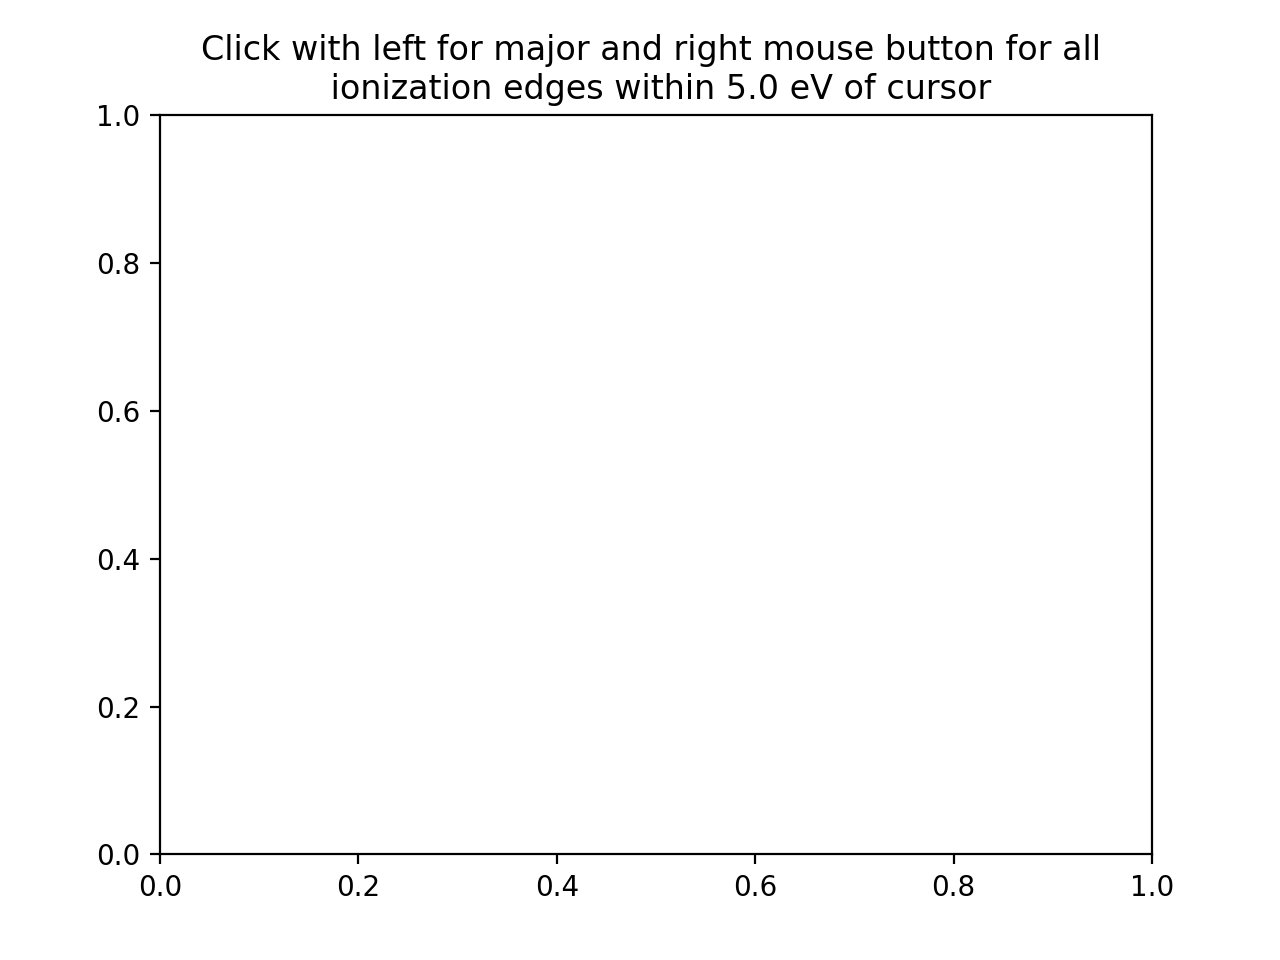

AttributeError: module 'pyTEMlib.eels_tools' has no attribute 'EdgesAtCursor'

In [25]:
# We are using 
# from matplotlib.widgets import Cursor


maximal_chemical_shift = 5
fig, ax = plt.subplots()
plt.title(f'Click with left for major and right mouse button for all \n ionization edges within {maximal_chemical_shift:.1f} eV of cursor')
maximal_chemical_shift = 5
cursor = eels.EdgesAtCursor(ax, Xsections['42']['ene'], Xsections['42']['dat'],maximal_chemical_shift)
cursor.maximal_chemical_shift =maximal_chemical_shift
cid =  plt.connect('motion_notify_event', cursor.mouse_move)

ax.plot(Xsections['16']['ene'], Xsections['16']['dat']*2, label = 'S')
ax.plot(Xsections['42']['ene'], Xsections['42']['dat'], 'r', label = 'Mo')
ax.set_xlim(0,500)
ax.set_ylim(0,2.5e17);




## EELS cross sections
### Determine Effective Collection Angle

EELS cross sections are dependent on the momentum transfer (angle dependence), while photons cannot transfer any momentum. The angle dependence is given by the experimental set-up and can be calculated by the convolution of collection and convergence angle.

Here we use the method of [Pierre Trebbia, Ultramicroscopy **24** (1988) pp.399-408](https://doi.org/10.1016/0304-3991(88)90130-1)


In [26]:
def effbeta(ene,  alpha, beta, beamkV):
    """ effective collection angle for convergent beam setup
    
    
    
    Original abstract of function y = effbeta(ene,  alpha, beta, beamkV)
    # 
    #       This program computes etha(alpha,beta), that is the collection
    #       efficiency associated to the following geometry :
    #
    #       alpha = half angle of illumination  (0 -> pi/2)
    #       beta  = half angle of collection    (0 -> pi/2)
    #                                           (pi/2 = 1570.795 mrad)
    #
    #           A constant angular distribution of incident electrons is assumed
    #       for any incident angle (-alpha,alpha). These electrons impige the
    #       target and a single energy loss event occurs, with a characteristic
    #       angle theta-e (relativistic). The angular distribution of the
    #       electrons after the target is analytically derived.
    #           This program integrates this distribution from theta=0 up to
    #       theta=beta with an adjustable angular step.
    #           This program also computes beta* which is the theoretical
    #       collection angle which would give the same value of etha(alpha,beta)
    #       with a parallel incident beam.
    #
    #       subroutines and function subprograms required
    #       ---------------------------------------------
    #       none
    #
    #       comments
    #       --------
    #
    #       The following parameters are asked as input :
    #        accelerating voltage (kV), energy loss range (eV) for the study,
    #        energy loss step (eV) in this range, alpha (mrad), beta (mrad).
    #       The program returns for each energy loss step :
    #        alpha (mrad), beta (mrad), theta-e (relativistic) (mrad),
    #        energy loss (eV), etha (#), beta * (mrad)
    #
    #       author :
    #       --------
    #       Pierre TREBBIA
    #       US 41 : "Microscopie Electronique Analytique Quantitative"
    #       Laboratoire de Physique des Solides, Bat. 510
    #       Universite Paris-Sud, F91405 ORSAY Cedex
    #       Phone : (33-1) 69 41 53 68
    #
    #       
    """
        
       
    z1 = beamkV*1000.  ;   # eV
    z2 = ene[0];
    z3 = ene[-1]
    z4 = 100.0
    z5 = alpha*0.001   # rad
    z6 = beta*0.001    # rad
    z7 = 500          # number of integration steps to be modified at will

    # main loop on energy loss
    
    for  zx in range(int(z2),int(z3),int(z4)): #! zx = current energy loss
        eta=0.0;
        x0=float(zx)*(z1+511060.)/(z1*(z1+1022120.));  # x0 = relativistic theta-e
        x1 = np.pi/(2.*x0);
        x2=x0*x0+z5*z5;
        x3=z5/x0*z5/x0;
        x4=0.1*np.sqrt(x2);
        dtheta=(z6-x4)/z7;
    #
    # calculation of the analytical expression
    #
    for zi in range(1, int(z7)):
        theta=x4+dtheta*float(zi);
        x5=theta*theta;
        x6=4.*x5*x0*x0;
        x7=x2-x5;
        x8=np.sqrt(x7*x7+x6);
        x9=(x8+x7)/(2.*x0*x0);
        x10=2.*theta*dtheta*np.log(x9);
        eta=eta+x10;

          

    eta=eta+x2/100.*np.log(1.+x3)   ;  # addition of the central contribution
    x4=z5*z5*np.log(1.+x1*x1);         # normalisation
    eta=eta/x4;
    #
    #        correction by geometrical factor (beta/alpha)**2
    #
    if (z6<z5):
        x5=z5/z6;
        eta=eta*x5*x5;

    etha2=eta*100.;
    #
    #        calculation of beta *
    #
    x6=np.power((1.+x1*x1),eta);
    x7=x0*np.sqrt(x6-1.);
    y=x7*1000.;

    
    return y

    

In [27]:
energy_scale = np.linspace(100,500,1000)
eff_beta = effbeta(energy_scale,  alpha=30, beta=33, beamkV=200000)
print(eff_beta)

23.964148239113346


## EELS cross sections
### Calculating EELS Cross Section

EELS cross sections are dependent on the momentum transfer (angle dependence), while photons cannot transfer any momentum. The angle dependence of the cross-section is aproximated by the equation 4 in:
[Egerton Ultramicroscopy 50 (1993) 13-28](https://doi.org/10.1016/0304-3991(93)90087-E)

In [ ]:

from scipy.interpolate import splev,splrep,splint
#from scipy.integrate import quad
from scipy.interpolate import interp1d
from scipy.optimize import leastsq

def xsecXRPA(energy_scale, E0, Z, beta, shift=0 ):
    """
    Calculate momentum-integrated cross-section for EELS from X-ray photoaborption  cross-sections.
    
    Input:
    ------
    energy_scale: energyscale of spectrum to be analyzed
    E0: acceleration voltage in keV
    Z: atomic number of element
    beta: effective collection angle in mrad
    shift: chemical shift of edge in eV
    """
 
    beta = beta * 0.001;     #% collection half angle theta [rad]
    #thetamax = self.parent.spec[0].convAngle * 0.001;  #% collection half angle theta [rad]
    dispersion = energy_scale[1]-energy_scale[0]
    
    Xsections = eels.get_Xsections(Z)
    enexs = Xsections['ene']
    datxs = Xsections['dat']
        
    #####
    ## Cross Section according to Egerton Ultramicroscopy 50 (1993) 13-28 equation (4)
    #####

    # Relativistic correction factors
    T = 511060.0*(1.0-1.0/(1.0+E0/(511.06))**2)/2.0;
    gamma=1+E0/511.06;
    A = 6.5#e-14 *10**14
    b = beta

    thetaE = enexs/(2*gamma*T)

    G = 2*np.log(gamma)-np.log((b**2+thetaE**2)/(b**2+thetaE**2/gamma**2))-(gamma-1)*b**2/(b**2+thetaE**2/gamma**2)
    datxs = datxs*(A/enexs/T)*(np.log(1+b**2/thetaE**2)+G)/1e8

    datxs = datxs * dispersion # from per eV to per dispersion
    coeff = splrep(enexs,datxs,s=0) # now in areal density atoms / m^2
    xsec = np.zeros(len(energy_scale ))
    #shift = 0# int(ek -onsetXRPS)#/dispersion
    lin = interp1d(enexs,datxs,kind='linear') # Linear instead of spline interpolation to avoid oscillations.
    xsec = lin(energy_scale-shift)
    
    return xsec
energy_scale = np.arange(100,600)
B_Xsection = xsecXRPA(energy_scale, 200, 5,  10. )/1e10  
N_Xsection = xsecXRPA(energy_scale, 200, 7,  10. )/1e10       #  xsec  is in barns = 10^28 m2 = 10^10 nm2


## Plotting of Cross Sections
please note that spectrum and cross sections are not on the same scale

<IPython.core.display.Javascript object>


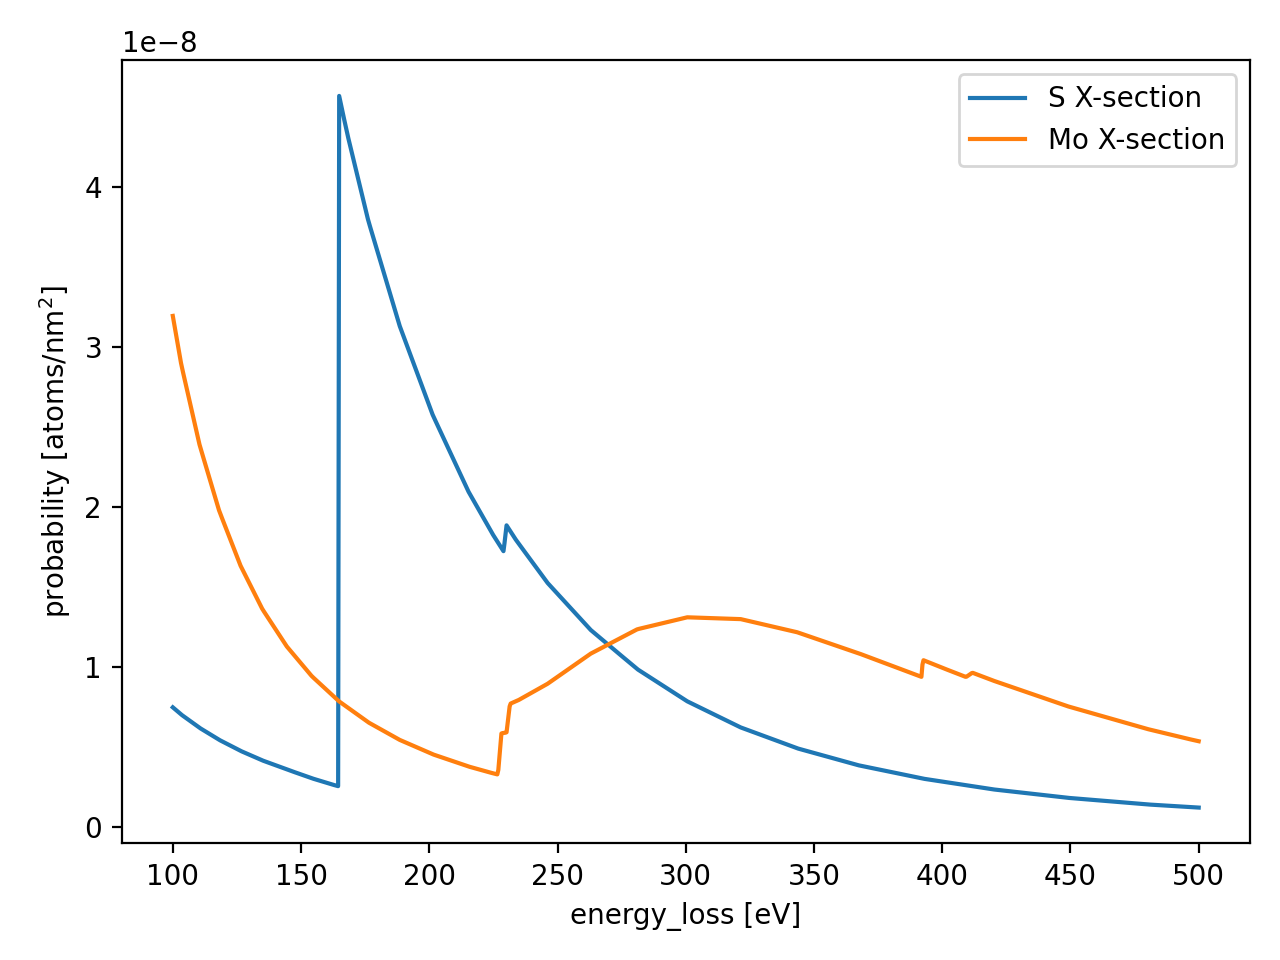

In [31]:
#energy_scale = energy_scale_orig*1.04-8

S_Xsection  = eels.xsec_xrpa(energy_scale, 200, 16, 10. )/1e10  
Mo_Xsection = eels.xsec_xrpa(energy_scale, 200, 42, 10. ,shift=0)/1e10       #  xsec  is in barns = 10^28 m2 = 10^10 nm2

fig, ax1 = plt.subplots()

ax1.plot(energy_scale, S_Xsection, label='S X-section' )
ax1.plot(energy_scale, Mo_Xsection, label='Mo X-section' )
ax1.set_xlabel('energy_loss [eV]')
ax1.set_ylabel('probability [atoms/nm$^{2}$]')


plt.legend();
fig.tight_layout();

# Regions select

<IPython.core.display.Javascript object>


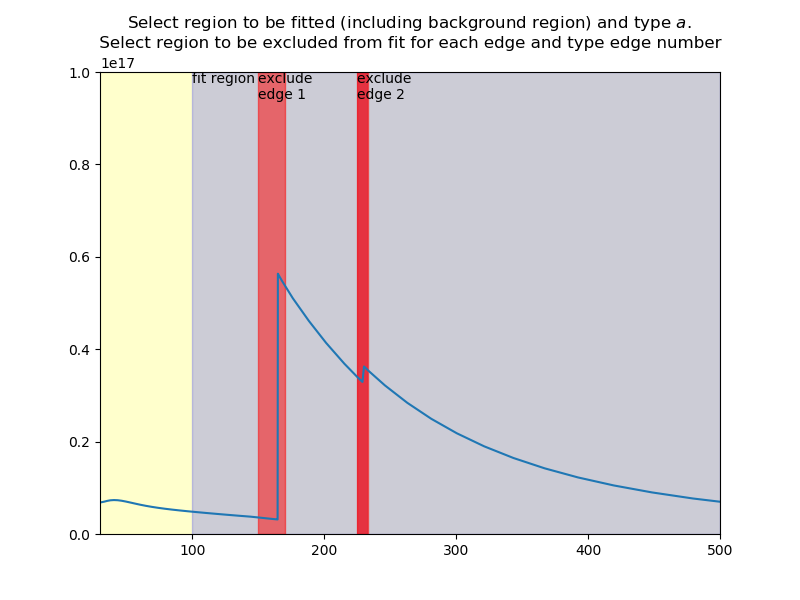

In [18]:

# We are using here 
from matplotlib.patches import Rectangle
from matplotlib.widgets import SpanSelector

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, facecolor='#FFFFCC')

x = Xsections['16']['ene']
y = Xsections['16']['dat']

ax.plot(x, y, '-')
ax.set_xlim(30,500 )
ax.set_ylim(0,1e17 )
ax.set_title('Select region to be fitted (including background region) and type $a$. \n Select region to be excluded from fit for each edge and type edge number \n')

regions = {}
hmin = 0
hmax = 0

    
class Region_Selector(object):
    def __init__(self, ax):
        self.ax = ax
        self.regions = {}
        self.rect = None
        self.xmin = 0
        self.xwidth = 0
         
        self.span = SpanSelector(ax, self.onselect1, 'horizontal', useblit = True,
                    rectprops=dict(alpha=0.5, facecolor='red'), span_stays=True)
        self.cid = ax.figure.canvas.mpl_connect('key_press_event', self.click)
        self.draw = ax.figure.canvas.mpl_connect('draw_event', self.onresize)
        
    def onselect1(self, xmin, xmax):
        self.xmin =  xmin
        self.width = xmax-xmin
    
    def onresize(self, event):
        self.update()
        
    def delete_region(self, key):
        if key in self.regions:
            if 'Rect' in self.regions[key]:
                self.regions[key]['Rect'].remove()
                self.regions[key]['Text'].remove()
            del(self.regions[key]) 
        
    def update(self):
        
        y_min, y_max = self.ax.get_ylim()
        for key in self.regions:
            if 'Rect' in self.regions[key]:
                self.regions[key]['Rect'].remove()
                self.regions[key]['Text'].remove()
       
            xmin = self.regions[key]['xmin']
            width = self.regions[key]['width']
            height = y_max-y_min 
            alpha = self.regions[key]['alpha']
            color = self.regions[key]['color']
            self.regions[key]['Rect'] =  Rectangle((xmin,y_min), width,height, 
                                                    edgecolor=color,alpha=alpha, facecolor=color)
            self.ax.add_patch(self.regions[key]['Rect'])

            self.regions[key]['Text'] = self.ax.text(xmin, y_max, self.regions[key]['text'],verticalalignment='top')
       
            
    def click(self, event):
        if str(event.key) in ['1','2','3','4','5','6']:
            key = str(event.key)
            text = 'exclude \nedge ' + key
            alpha = 0.5
            color = 'red'
        elif str(event.key) in ['a', 'A', 'b', 'B']:
            key = '0'
            color = 'blue'
            alpha = 0.2
            text = 'fit region'
        else:
            return
       
        if key not in self.regions:
            self.regions[key] = {}

        self.regions[key]['xmin'] = self.xmin
        self.regions[key]['width'] = self.width
        self.regions[key]['color'] = color
        self.regions[key]['alpha'] = alpha
        self.regions[key]['text'] = text
        
        self.update()
    
    
    def set_regions(self, region, start_x, width):
        if 'fit' in str(region):
            key = '0'
        if region in ['0', '1','2','3','4','5','6']:
            key = region
        if region in [0,1,2,3,4,5,6]:
            key = str(region)
             
            
        if key not in self.regions:
            self.regions[key] = {}
            if key in ['1','2','3','4','5','6']:
                self.regions[key]['text'] = 'exclude \nedge ' + key
                self.regions[key]['alpha'] = 0.5
                self.regions[key]['color'] = 'red'
            elif key == '0':
                self.regions[key]['text'] = 'fit region'
                self.regions[key]['alpha'] = 0.2
                self.regions[key]['color'] = 'blue'
            
        self.regions[key]['xmin'] = start_x
        self.regions[key]['width'] = width
            
        self.update()
            
    def get_regions(self):
        tags = {}
        for key in self.regions:
            if key == '0':
                area = 'fit_area'
            else:
                area =  key
            tags[area] = {}
            tags[area]['start_x'] = self.regions[key]['xmin']
            tags[area]['width_x'] = self.regions[key]['width']

        return tags
    
    def disconnect(self):
        del(self.span)
        self.ax.figure.canvas.mpl_disconnect(self.cid)
        #self.ax.figure.canvas.mpl_disconnect(self.draw)
        pass
        
        
regions = Region_Selector(ax)



Sometimes one wants to delete a region 

In [19]:
regions.delete_region('1')

One can get the regions with:

In [20]:
print(regions.get_regions())

{'fit_area': {'start_x': 90.0008018247543, 'width_x': 324.45161290322574}, '2': {'start_x': 224.936285695722, 'width_x': 8.338709677419388}}


We can go in and directly change the values of the regions

In [21]:
regions.regions['0']['width'] = 200.
regions.update()

But there is also a function for that

In [22]:
regions.set_regions('1',150., 20.)
regions.set_regions('fit region',100., 400.)

Disconnect region selector so that nothing is changed anymore

In [23]:
regions.disconnect()

But so that you still can access the regions selected.

In [24]:
print(regions.get_regions())

{'fit_area': {'start_x': 100.0, 'width_x': 400.0}, '2': {'start_x': 224.936285695722, 'width_x': 8.338709677419388}, '1': {'start_x': 150.0, 'width_x': 20.0}}


### With a spectrum

In [25]:
%pylab --no-import-all notebook
%gui qt

## import the configuration files of pyTEMlib (we need access to the data folder)
import pyTEMlib.EELS_tools as eels
import pyTEMlib.file_tools  as ft 


Populating the interactive namespace from numpy and matplotlib


In [27]:

h5_file = ft.h5open_file()#os.path.join(current_directory,filename))
current_channel = h5_file['Measurement_000/Channel_000']
tags = ft.h5_get_dictionary(current_channel)

current_channel['Raw_Data'][0,:] = current_channel['Raw_Data'][0,:]-current_channel['Raw_Data'][0,:].min()
current_channel['spectral_origin_x'][()] = current_channel['spectral_origin_x'][()]-30

<IPython.core.display.Javascript object>


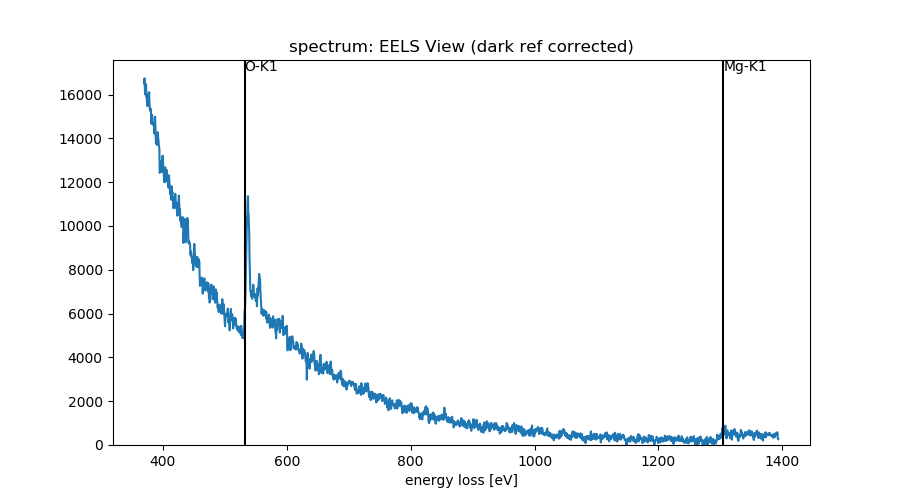

In [28]:
# Create new Figure with black background
fig = plt.figure(figsize=(9,5))

# Add a subplot with no frame
ax = plt.subplot(111)
ft.plt_pyUSID(current_channel,ax)

#ax.plot(energy_scale, data)

Add Elements and Cursor for element selection in above figure.

In [29]:
tags = ft.h5_get_dictionary(current_channel)

maximal_chemical_shift=5
cursor = eels.EdgesatCursor(ax, tags['energy_scale'], tags['data'], maximal_chemical_shift)

Mg_edges = eels.elemental_edges(ax, 'Mg')
Cu_edges = eels.elemental_edges(ax, 'Cu')
O_edges  = eels.elemental_edges(ax, 'O')

Remove edges that are not there and delete cursor.

In [30]:
Cu_edges.disconnect()
cursor.del_edges()
cursor.disconnect()
del(cursor)

## Reading Microscope dictionary parameters

In [19]:
print(pyTEMlib.config_dir.data_path)

print(os.listdir(pyTEMlib.config_dir.data_path))

import csv

with open(pyTEMlib.config_dir.config_path+'\microscopes.csv') as csv_file:
    
    csv_reader = csv.DictReader(csv_file)
    line_count = 0
    microscopes = {}
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        microscopes[str(line_count-1)] = row
        line_count += 1
    print(f'Processed {line_count} lines.')
    

print(f'There are {len(microscopes.keys())} microscopes in the set-up file')
print(microscopes['0'])


#f = open(pyTEMlib.config_dir.data_path+'\microscopes.csv')

C:\Users\gdusc\Anaconda3\lib\site-packages\pyTEMlib\data
['edges_db.csv', 'edges_db.pkl', 'fparam.txt', 'microscopes.csv', 'microscopes.xml', 'path.txt', 'TEMlibrc']
Column names are Microscope, E0, alpha, beta, pppc, correlation_factor, VOA_conv, EELS_b1, EELS_b2, EELS_b100, MADF_offset, MADF_slope, HADF_offset, HADF_slope, BF_offset, BF_slope
Processed 9 lines.
There are 8 microscopes in the set-up file
OrderedDict([('Microscope', 'Default'), ('E0', '1.00E+05'), ('alpha', '10'), ('beta', '13'), ('pppc', '1'), ('correlation_factor', '1'), ('VOA_conv', '0'), ('EELS_b1', '0'), ('EELS_b2', '0'), ('EELS_b100', '0'), ('MADF_offset', '0'), ('MADF_slope', '0'), ('HADF_offset', '0'), ('HADF_slope', '0'), ('BF_offset', '0'), ('BF_slope', '0')])


## Adding a New Microscope to Dictionary

In [20]:
#First copy default microscoe to new microscope 
microscopes['7'] = microscopes['0'].copy()

#change name
microscopes['7']['Microscope'] = 'Titan'
microscopes['7']['E0'] = 200000 # in eV
microscopes['7']['alpha'] = 30 # in mrad
microscopes['7']['beta'] = 50  # in mrad

## Updating Microscope File

In [21]:
fieldnames = microscopes['0'].keys()

with open(pyTEMlib.config_dir.config_path+'\microscopes.csv',  mode='r+') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    writer.writeheader()
    for key in microscopes:
        writer.writerow(microscopes[key])
